---

## Inspiration for this Model
 I was in high school attending public school in downtown Chicago. I remember sometimes being afraid of civil unrest, especially surrounding high-profile court cases and during COVID-19. I remember experiencing teacher strikes, crazy winter storms, and other volatile activity, thinking: is it still safe to take the L blue line train to school today?

## What data will I use?
 I will use the GDELT database to identify violent events. Specifically, I will pull events with the code **145X** from the GDELT Event Database. We'll first visualize the data and then decide how to build our model.

---

--- 

Loading testing Data

In [8]:
# You might need to install these packages here
# %pip install keras
# %pip install tensorflow

import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense

import matplotlib.pyplot as plt

In [9]:
# Load the test and train data
test_data = pd.read_csv('test_data.csv')
train_data = pd.read_csv('train_data.csv')

# Display the first few rows of each dataframe to verify
test_data.head()

,SQLDATE,Number of Events,Total AvgTone
0,2021-01-01,0,0.0
1,2021-01-02,0,0.0
2,2021-01-03,0,0.0
3,2021-01-04,0,0.0
4,2021-01-05,0,0.0


In [10]:
train_data.head()

,SQLDATE,Number of Events,Total AvgTone
0,2015-12-25,1,-12.850954
1,2015-12-26,0,0.000000
2,2015-12-27,0,0.000000
3,2015-12-28,0,0.000000
4,2015-12-29,0,0.000000


---

## Building the Model

The goal would be to take the last 7 days of data, and use it to predict the next day. I want to build a model that predicts the number of civil unrest events that will occur in the next 24 hrs.

Let's attempt the LSTM model.

---

--- 

Data formatting. We want a $\vec X$ of the historical data, and map it to $Y$, the output. 

It'll require some manipulation of the exisitng data.

---

In [14]:
test_X = []
test_Y = []
for i in range(30, len(test_data)):
    test_X.append(test_data.iloc[i-30:i][['Total AvgTone', 'Number of Events']].values)
    test_Y.append(test_data.iloc[i]['Total AvgTone'])

train_X = []
train_Y = []
for i in range(30, len(train_data)):
    train_X.append(train_data.iloc[i-30:i][['Total AvgTone', 'Number of Events']].values)
    train_Y.append(train_data.iloc[i]['Total AvgTone'])

# Convert lists to numpy arrays
test_X = np.array(test_X)
test_Y = np.array(test_Y)
train_X = np.array(train_X)
train_Y = np.array(train_Y)

In [19]:
test_X[0]

array([[ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [-0.95238095,  1.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,

In [18]:
test_Y[0]

0.0

Let's make a few modifications and then build the model.

ValueError: cannot reshape array of size 108240 into shape (1804,30,1)

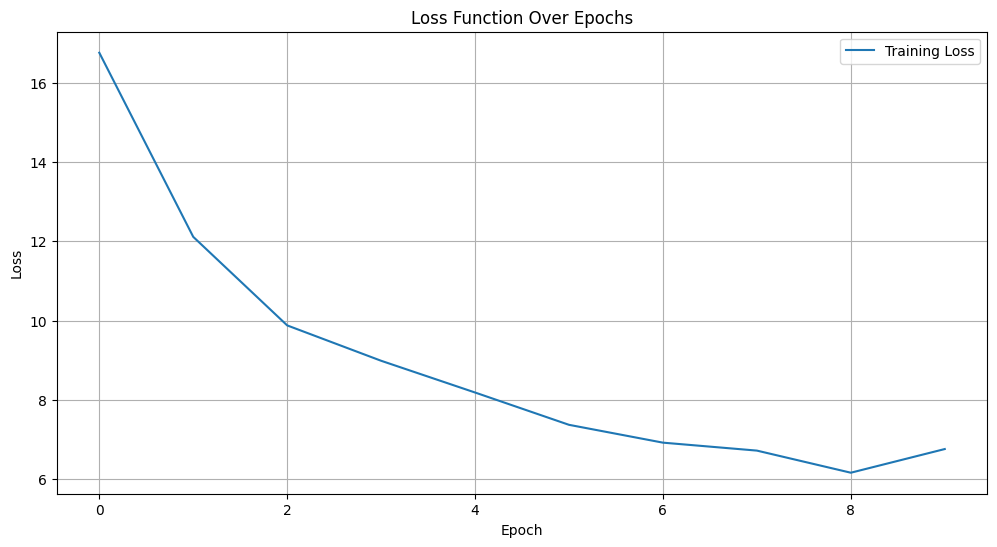

In [ ]:
# Plot the loss function over the epochs
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Loss Function Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

---

Predictions:

In [ ]:
# Make predictions on the test data
predictions = model.predict(test_X)

# Adjust the index to start on 2021-01-01
adjusted_index = pd.date_range(start='2021-01-01', periods=len(test_Y), freq='D')

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


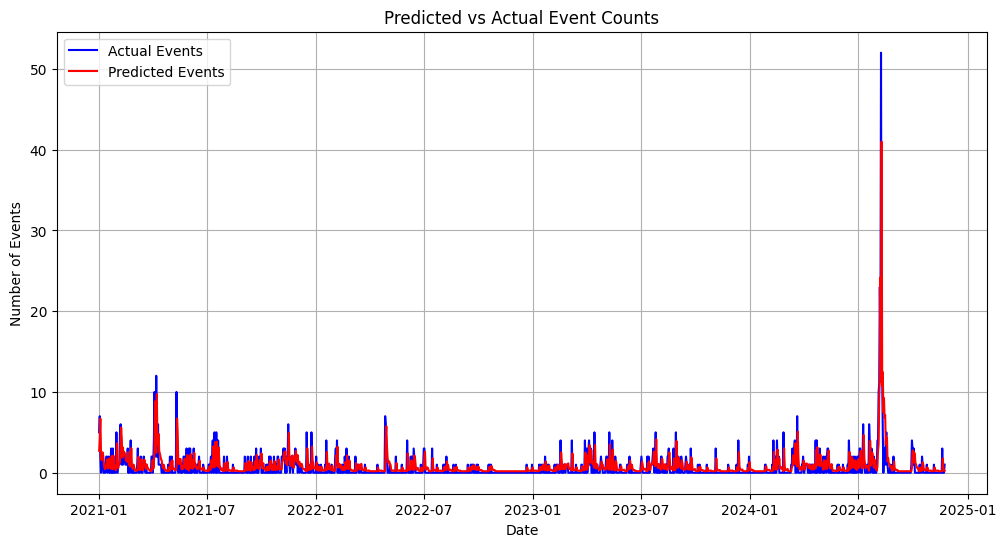

In [ ]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(adjusted_index, test_Y, label='Actual Events', color='blue')
plt.plot(adjusted_index, predictions, label='Predicted Events', color='red')
plt.title('Predicted vs Actual Event Counts')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.legend()
plt.grid(True)
plt.show()

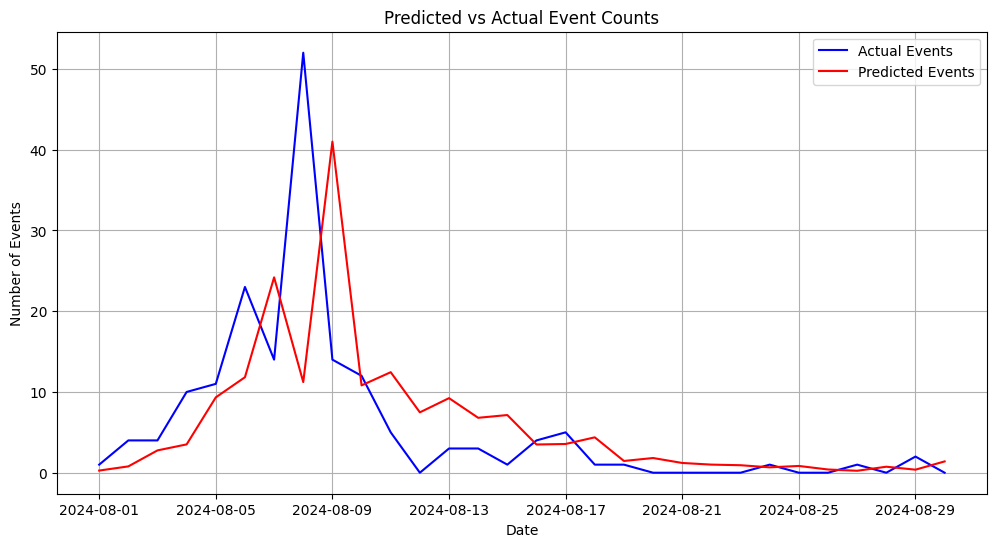

In [ ]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(adjusted_index[1308:1338], test_Y[1308:1338], label='Actual Events', color='blue')
plt.plot(adjusted_index[1308:1338:], predictions[1308:1338], label='Predicted Events', color='red')
plt.title('Predicted vs Actual Event Counts')
plt.xlabel('Date')
plt.ylabel('Number of Events')
plt.legend()
plt.grid(True)
plt.show()

---

The model actually seemed to predict the DNC protests that occured in Chicago!

The greatest area for improvement in this model would be to reduce the lag in the model. It really helps when protests start to ramp up, because the model picks up on this and then predicts a growth in the civil unrest events. 

However, this almost defeats the point if you are a day late from knowing when protest peak. You already went to school or work.

I could have an off-by-1 error in my code. That would be more realistic. I'm I'm frankly pretty shocked the model was so accurate. I need to double check there's no error in the training & testing data.

If I accidentlly trained on the test data, that would be a huge error. I'll need to double check my work. 

---

---

### Error Correction

I need to double check to see if there's overfitting or if the model is being trained on test data. I'll probably refactor my code to make it better to double check, and then see if these results hold.

### Expanding and Improving

Then I might improve the model to see if I can predict 2 days out. I might include more inputs like S&P performance, inflation, violitility indexes, semantic news data, and more to improve the model in the future.

---